# 1. Loading Dataset

In [13]:
import torch
from torchvision import datasets, transforms
import matplotlib . pyplot as plt

In [14]:
transform = transforms . Compose ([ transforms . ToTensor () ,
transforms . Normalize ((0.5 , ),
(0.5 ,))])
trainset = datasets . FashionMNIST ('~/. pytorch / F_MNIST_data /', download =True, train =True , transform = transform)
trainloader = torch . utils . data . DataLoader (trainset, batch_size = 32, shuffle = True)
testset = datasets . FashionMNIST ('~/. pytorch / F_MNIST_data /', download =True, train =False, transform = transform)
testloader = torch . utils . data . DataLoader (testset, batch_size = 32, shuffle = False)

In [15]:
batch = next(iter(trainloader))
print(batch[0].shape, batch[1].shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


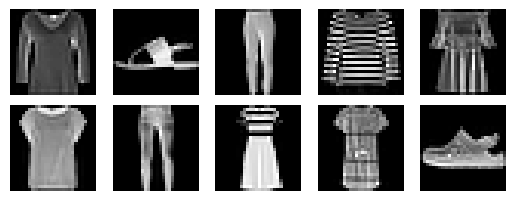

In [13]:
f, ax = plt.subplots(2, 5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
for i in range(2):
    for j in range(5):
        image, label = next(iter(trainloader))
        ax[i][j].set_axis_off()
        ax[i][j].imshow(image[0 ,0 ,:], cmap='gray')

# 2. Multilayer Perceptrons (MLP)

In [14]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [21]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation_fn=nn.ReLU()):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_sizes[0]),
            activation_fn,
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            activation_fn,
            nn.Linear(hidden_sizes[1], output_size)
        )

    def forward(self, x):
        return self.layers(x)


In [16]:
def train_and_test(model, trainloader, testloader, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

    # Testing
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')
    return accuracy


In [25]:
input_size = 28 * 28  # Images are 28x28 pixels
output_size = 10  # 10 classes in FashionMNIST
activation_fn = nn.ReLU()

# Different architectures
hidden_sizes_list = [
    [128, 64], # Two Hidden Layers: Small
    [256, 128], # Two Hidden Layers: Medium
    [512, 256], # Two Hidden Layers: Large
    [256, 128, 64], # Three Hidden Layers
    [512, 256, 128, 64] # Four Hidden Layers
]

# Testing different architectures
for hidden_sizes in hidden_sizes_list:
    print(f"Testing MLP with hidden layers {hidden_sizes}")
    model = MLP(input_size, hidden_sizes, output_size, activation_fn)
    train_and_test(model, trainloader, testloader)


Testing MLP with hidden layers [128, 64]
Epoch 1, Loss: 0.4945279148578644
Epoch 2, Loss: 0.37012995717128117
Epoch 3, Loss: 0.33588705893357595
Epoch 4, Loss: 0.3104670886794726
Epoch 5, Loss: 0.29402370284001034
Epoch 6, Loss: 0.2795418405254682
Epoch 7, Loss: 0.26772930315732957
Epoch 8, Loss: 0.25392050263285637
Epoch 9, Loss: 0.24650780558288096
Epoch 10, Loss: 0.23640394896169503
Accuracy: 88.46%
Testing MLP with hidden layers [256, 128]
Epoch 1, Loss: 0.485050350356102
Epoch 2, Loss: 0.3705608543992043
Epoch 3, Loss: 0.3325315840740999
Epoch 4, Loss: 0.30445811033646264
Epoch 5, Loss: 0.28576118834813435
Epoch 6, Loss: 0.2722402514129877
Epoch 7, Loss: 0.2576722660193841
Epoch 8, Loss: 0.24431811384608348
Epoch 9, Loss: 0.23167917874852817
Epoch 10, Loss: 0.2231319791585207
Accuracy: 88.61%
Testing MLP with hidden layers [512, 256]
Epoch 1, Loss: 0.48455272212028505
Epoch 2, Loss: 0.369818910441796
Epoch 3, Loss: 0.3303058602869511
Epoch 4, Loss: 0.3046075420002143
Epoch 5, Loss

In [26]:
# Network configuration
input_size = 28 * 28  # Images are 28x28 pixels
hidden_sizes = [256, 128]
output_size = 10  # 10 classes in FashionMNIST

# Activation functions to test
activation_functions = [nn.ReLU(), nn.Sigmoid(), nn.Tanh()]

# Testing different activation functions
for activation_fn in activation_functions:
    print(f"Testing MLP with {activation_fn} activation function")
    model = MLP(input_size, hidden_sizes, output_size, activation_fn)
    train_and_test(model, trainloader, testloader)

Testing MLP with ReLU() activation function
Epoch 1, Loss: 0.48301940961678824
Epoch 2, Loss: 0.3702995877226194
Epoch 3, Loss: 0.33342728795409204
Epoch 4, Loss: 0.3083309006392956
Epoch 5, Loss: 0.28943484409451486
Epoch 6, Loss: 0.27257392453650636
Epoch 7, Loss: 0.2604246469815572
Epoch 8, Loss: 0.24673852429886658
Epoch 9, Loss: 0.2389525530119737
Epoch 10, Loss: 0.22645664103031157
Accuracy: 88.17%
Testing MLP with Sigmoid() activation function
Epoch 1, Loss: 0.57482577470541
Epoch 2, Loss: 0.3801313392718633
Epoch 3, Loss: 0.3409647510151068
Epoch 4, Loss: 0.3167257819831371
Epoch 5, Loss: 0.2967293636043866
Epoch 6, Loss: 0.283038308480382
Epoch 7, Loss: 0.2707559490710497
Epoch 8, Loss: 0.2603831140557925
Epoch 9, Loss: 0.24903351878225805
Epoch 10, Loss: 0.23881567812785506
Accuracy: 87.7%
Testing MLP with Tanh() activation function
Epoch 1, Loss: 0.4889911636630694
Epoch 2, Loss: 0.3940763307929039
Epoch 3, Loss: 0.3626637868642807
Epoch 4, Loss: 0.34587060204346975
Epoch 5,

In my iterations, testing with the [256, 128] hidden layers architecture gave me the most effective result, reaching an accuracy of 88.17% among differest architectures. This particular architecture is suggesting that a medium-sized network with neither too much depth nor too little is optimal for tasks such as image classification on the FashionMNIST dataset.

Next, when comparing different activation functions, ReLU showed me the most highest performance of 88.17%. Surprisingly, it was Sigmoid that came in just below, with an accuracy of 87.7%, slightly lower than ReLU's performance. Tanh ranked the lowest, achieving 86.28% accuracy, likely impacted by its tendency towards gradient saturation similar to Sigmoid but with a zero-centered output. Despite the general preference of ReLU for its ability to mitigate the vanishing gradient problem and usually outperforming Sigmoid, my iterations show that under specific conditions, there is no absolute superiority among activation functions. This underscores the necessity of empirical testing in many scenarios.

# 3. CNN

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torch.utils.data import DataLoader

In [4]:
# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1) # (a) a single convolutional layer with 3x3 window and 32 filters
        self.pool = nn.MaxPool2d(2, 2)              # (b) maxpooling layer with 2x2 window size
        self.flatten = nn.Flatten()                 # (c) flatten layer
        self.fc1 = nn.Linear(32 * 14 * 14, 100)     # (d) dense layer with 100 neurons
        self.fc2 = nn.Linear(100, 10)               # (e) dense layer with 10 neurons (output layer)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # apply convolution, relu, and pooling
        x = self.flatten(x)                   # (c) flatten the output
        x = F.relu(self.fc1(x))               # (d) apply the first dense layer with relu
        x = self.fc2(x)                       # (e) apply the second dense layer (output layer)
        return F.log_softmax(x, dim=1)

# Instantiate the network
model = CNN()

In [5]:
# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [92]:
# Function for training the model
def train(model, train_loader, optimizer, criterion):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# Function for evaluating the model
def evaluate(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy

# Training and evaluation loop
epochs = 10
for epoch in range(epochs):
    train(model, trainloader, optimizer, criterion)
    test_loss, accuracy = evaluate(model, testloader, criterion)
    print(f'Epoch: {epoch + 1}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

Epoch: 1, Test Loss: 0.0113, Accuracy: 87.13%
Epoch: 2, Test Loss: 0.0094, Accuracy: 89.38%
Epoch: 3, Test Loss: 0.0086, Accuracy: 90.21%
Epoch: 4, Test Loss: 0.0087, Accuracy: 90.28%
Epoch: 5, Test Loss: 0.0094, Accuracy: 90.03%
Epoch: 6, Test Loss: 0.0084, Accuracy: 90.94%
Epoch: 7, Test Loss: 0.0090, Accuracy: 90.19%
Epoch: 8, Test Loss: 0.0090, Accuracy: 90.97%
Epoch: 9, Test Loss: 0.0090, Accuracy: 90.95%
Epoch: 10, Test Loss: 0.0094, Accuracy: 91.19%


The final test accuracy with CNN is 91.19%, which is higher than the performance of MLP.

# Experimentation (a)

In [6]:
import matplotlib.pyplot as plt

Epoch: 10, Training Accuracy: 98.80%, Validation Accuracy: 90.73%
Epoch: 20, Training Accuracy: 99.78%, Validation Accuracy: 90.84%
Epoch: 30, Training Accuracy: 100.00%, Validation Accuracy: 91.51%
Epoch: 40, Training Accuracy: 100.00%, Validation Accuracy: 91.63%
Epoch: 50, Training Accuracy: 100.00%, Validation Accuracy: 91.65%


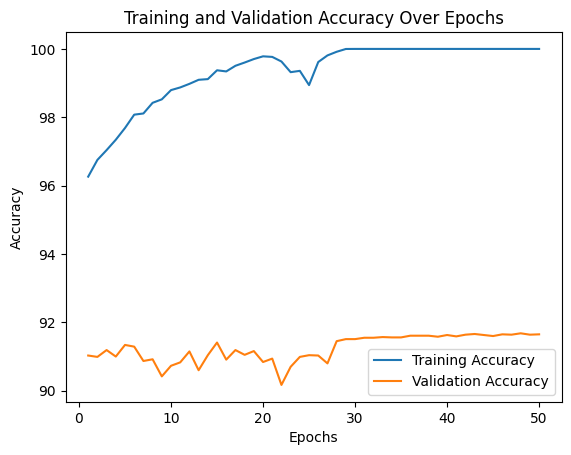

In [94]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    total = 0
    correct = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.size(0)
    return 100. * correct / total

def evaluate(model, test_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)
    return 100. * correct / total

# Arrays to store accuracies
train_accuracies = []
val_accuracies = []

# Training and evaluation loop
epochs = 50
for epoch in range(epochs):
    train_acc = train(model, trainloader, optimizer, criterion)
    val_acc = evaluate(model, testloader)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch + 1}, Training Accuracy: {train_acc:.2f}%, Validation Accuracy: {val_acc:.2f}%')

# Plotting
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

Based on my results, the model shows signs of overfitting. The training accuracy rapidly climbs to 100% by the 30th epoch and remains there, indicating that the model has perfectly fit to the training dataset. On the other hand, the validation accuracy starts at 90.73% and we can see there is only a little improvement, eventually reaching 91.65%. This marginal improvement in validation accuracy, coupled with the perfect training accuracy, signals that while the model can recall the training data, it struggles to generalize this knowledge to unseen data, which is a indicator of overfitting.

# Experimentation (b)

In [7]:
# Define the CNN architecture with dropout
class CNN_dropout(nn.Module):
    def __init__(self):
        super(CNN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 14 * 14, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.flatten(x)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Initialize the model
model = CNN_dropout()

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Epoch: 10, Training Accuracy: 92.50%, Validation Accuracy: 91.17%
Epoch: 20, Training Accuracy: 94.59%, Validation Accuracy: 91.10%
Epoch: 30, Training Accuracy: 95.45%, Validation Accuracy: 91.40%
Epoch: 40, Training Accuracy: 96.31%, Validation Accuracy: 91.47%
Epoch: 50, Training Accuracy: 96.76%, Validation Accuracy: 91.03%


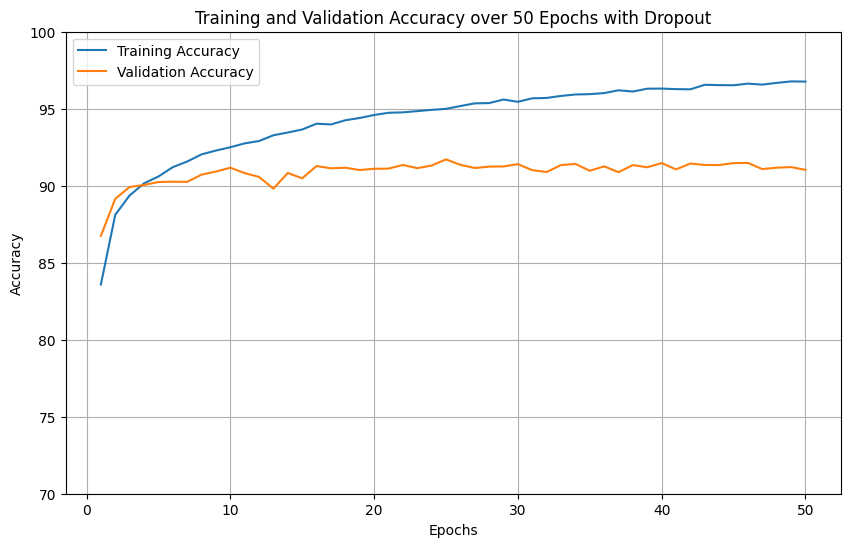

In [100]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    total = 0
    correct = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.size(0)
    return 100. * correct / total

def evaluate(model, test_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)
    return 100. * correct / total

# Arrays to store the accuracies
train_accuracies = []
val_accuracies = []

# Training and evaluation loop
epochs = 50
for epoch in range(epochs):
    train_acc = train(model, trainloader, optimizer, criterion)
    val_acc = evaluate(model, testloader)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch + 1}, Training Accuracy: {train_acc:.2f}%, Validation Accuracy: {val_acc:.2f}%')


# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 51), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy over 50 Epochs with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(0, 51, 10))
plt.yticks(range(70, 101, 5))
plt.grid(True)
plt.show()

After using the 'dropout' technique, the validation accuracy did not changed severly or steadily increased, but the training accuracy improved as the epoch proceeded. As a result, we can say that the 'dropout' technique is preventing neural networks from overfitting. 

# Experimentation (c)

In [9]:
class CNN_dropout_modification(nn.Module):
    def __init__(self):
        super(CNN_dropout_modification, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # new convolutional layer
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.flatten = nn.Flatten()
        # Adjusted input dimensions for the first fully connected layer
        self.fc1 = nn.Linear(64 * 7 * 7, 100)  # Adjust the dimensions accordingly
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))  # new convolutional and pooling layers
        x = self.flatten(x)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Initialize the updated model
model = CNN_dropout_modification()

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Epoch: 1, Training Accuracy: 94.62%, Validation Accuracy: 92.47%
Epoch: 2, Training Accuracy: 94.68%, Validation Accuracy: 91.69%
Epoch: 3, Training Accuracy: 94.93%, Validation Accuracy: 92.27%
Epoch: 4, Training Accuracy: 94.80%, Validation Accuracy: 92.45%
Epoch: 5, Training Accuracy: 94.94%, Validation Accuracy: 92.84%
Epoch: 6, Training Accuracy: 95.18%, Validation Accuracy: 92.48%
Epoch: 7, Training Accuracy: 95.36%, Validation Accuracy: 92.76%
Epoch: 8, Training Accuracy: 95.21%, Validation Accuracy: 92.17%
Epoch: 9, Training Accuracy: 95.34%, Validation Accuracy: 92.32%
Epoch: 10, Training Accuracy: 95.53%, Validation Accuracy: 92.10%
Test Accuracy: 92.10%


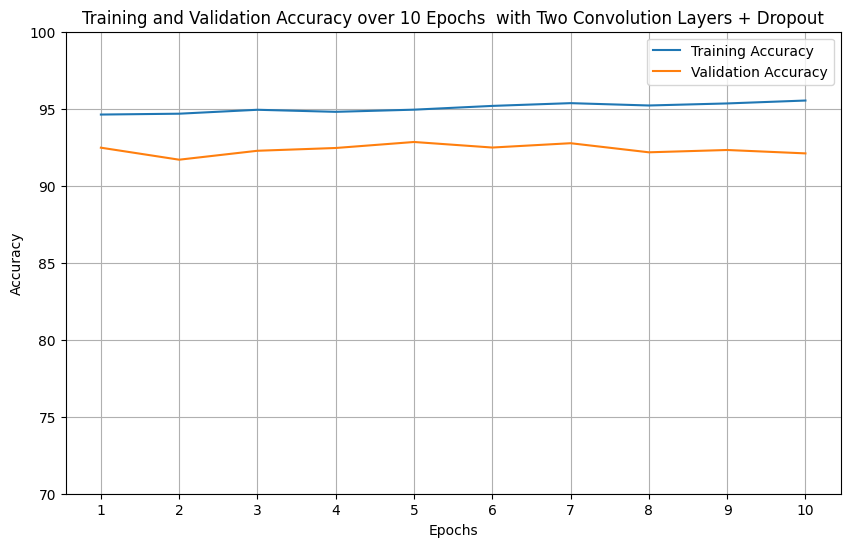

In [18]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    total = 0
    correct = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.size(0)
    return 100. * correct / total

def evaluate(model, test_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)
    return 100. * correct / total

# Arrays to store the accuracies
train_accuracies = []
val_accuracies = []

# Training and evaluation loop
epochs = 10
for epoch in range(epochs):
    train_acc = train(model, trainloader, optimizer, criterion)
    val_acc = evaluate(model, testloader)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Print after every epoch
    print(f'Epoch: {epoch + 1}, Training Accuracy: {train_acc:.2f}%, Validation Accuracy: {val_acc:.2f}%')

# Evaluate on test data
test_accuracy = evaluate(model, testloader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 11), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy over 10 Epochs  with Two Convolution Layers + Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(1, 11, 1))
plt.yticks(range(70, 101, 5))
plt.grid(True)
plt.show()

# Experimentation (d)

In [110]:
model = CNN_dropout_modification()

# Loss function
criterion = nn.CrossEntropyLoss()

def train(model, train_loader, optimizer, criterion):
    model.train()
    total = 0
    correct = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.size(0)
    return 100. * correct / total

def evaluate(model, test_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)
    return 100. * correct / total

# Learning rates to test
learning_rates = [0.001, 0.1]

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    # Reinitialize the model for each learning rate
    model = CNN_dropout_modification()

    # Optimizer - using SGD as an example
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Training and evaluation loop
    epochs = 10
    for epoch in range(epochs):
        train_acc = train(model, trainloader, optimizer, criterion)
        val_acc = evaluate(model, testloader)

        # Print after every epoch
        print(f'Epoch: {epoch + 1}, Training Accuracy: {train_acc:.2f}%, Validation Accuracy: {val_acc:.2f}%')

    # Evaluation on test data after training is complete
    test_accuracy = evaluate(model, testloader)
    print(f"Learning Rate: {lr}, Test Accuracy: {test_accuracy:.2f}%")

Training with learning rate: 0.001
Epoch: 1, Training Accuracy: 41.86%, Validation Accuracy: 65.77%
Epoch: 2, Training Accuracy: 68.82%, Validation Accuracy: 73.59%
Epoch: 3, Training Accuracy: 74.52%, Validation Accuracy: 77.27%
Epoch: 4, Training Accuracy: 76.87%, Validation Accuracy: 78.64%
Epoch: 5, Training Accuracy: 78.25%, Validation Accuracy: 79.34%
Epoch: 6, Training Accuracy: 79.33%, Validation Accuracy: 81.38%
Epoch: 7, Training Accuracy: 80.11%, Validation Accuracy: 81.77%
Epoch: 8, Training Accuracy: 81.21%, Validation Accuracy: 83.03%
Epoch: 9, Training Accuracy: 81.56%, Validation Accuracy: 83.16%
Epoch: 10, Training Accuracy: 81.94%, Validation Accuracy: 83.82%
Learning Rate: 0.001, Test Accuracy: 83.82%
Training with learning rate: 0.1
Epoch: 1, Training Accuracy: 81.07%, Validation Accuracy: 87.28%
Epoch: 2, Training Accuracy: 87.66%, Validation Accuracy: 88.33%
Epoch: 3, Training Accuracy: 89.19%, Validation Accuracy: 88.61%
Epoch: 4, Training Accuracy: 89.98%, Valid

# Analysis

## (a) Explain how the trends in validation and train accuracy change after using the dropout layer in the experiments.

Considering the difference between 'without dropout (high training accuracy, reaching 100% / validation accuracy increases more slowly and plateaus around 91.65%)' and 'with dropout (lower training accuracy, peaking at 96.76% / similar validation accuracy, peaking at 91.47%), we can say that the dropout technique reduces overfitting. In detail, when I used dropout, the training accuracy was lower, indicating that the model is less memorizing the training data. Meanwhile, the validation accuracy does not significantly improve with dropout, but we can say it is more stable and generalizing better.


## (b) How does the performance of CNN with two convolution layers differ as compared to CNN with a single convolution layer in your experiments?

Since the 'CNN with dropouts and additional convolution layer' got the lower training accuracy of 95.53% than 'CNN with dropouts only' which got a 96.76% accuracy, we can say that the addition of one convolution layer is reducing overfitting. Also the gap between training and validation accuracy is much smaller (3.43% for CNN with two convolution layers / 5.73% for single convolution layer). Considering the maximum accuracy with two convolution layer is lower than the single layer one, the learning process may require more epochs, more training data, or different learning rate to improve the accuracy.


## (c) How did changing learning rates change your experimental results in part (iv)?

As seen in the result, the higher learning rate (0.1, final test accuracy of 92.04%) achieved faster convergence and better final accuracy than the slower learning rate (0.001, final test accuracy of 83.82%). By the result, we can think that model with the higher learning rate navigates the optimization process more effectively. However, when the learning rate goes to high, it can lead to instability or missing the global minimum, so we have to find the appropriate figure suitable for the dataset. In the case provided by the assignment, learning rate of 0.1 seems to be more effective.